# Red Wine Quality Predition case 

## Data Description

The dataset is related to red and white variants of Portugusee"Vinho Verde" wine.
The features about to physicochemical variables, there is no data about grape types,wine brand and price,etc
The target vriable is about the quality of wine score between 0 to 10, 10 is excellent and 0 is not good 

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

The Project is about Red Wine Quality Prediction. Loading a wine_quality.csv is the file, Start reading the file into pandas dataframe 

In [2]:
df=pd.read_csv('wine_quality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratort Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

## Statistical Summary

shape function is use to check the dimension of dataset

head() function gives first 5 rows of dataset

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


tail() function gives last 5 rows of dataset

In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


sample() function gives samples which we mentioned in it, gives randomly

In [6]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1354,7.2,0.58,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
504,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7
210,9.7,0.53,0.60,2.0,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1545,6.5,0.63,0.33,1.8,0.059,16.0,28.0,0.99531,3.36,0.64,10.1,6
781,6.5,0.46,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,5
1401,7.9,0.69,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5
610,8.8,0.24,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5
1565,6.7,0.67,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6


shape function gives the dimention of dataframe

In [7]:
df.shape

(1599, 12)

we have 1599 rows and 12 columns

info function is use to know the infomation about columns names and Non-Null count Dtype 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


dtypes function shows that data type of each column

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

quality is in int64 dtype and remaining columns are in float64 dtypes

snull() function is use to determine the null value in the data. it gives True and False values if it giving True it means that is a null valueand if it gives False it is not null value

In [10]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


isnull().sum() is give to count of null vlaues in the total coumn 

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there is no null values in data set

#### Describing the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

### uni-variate plot

We can use seaborn to create a simple heatmap to see where we are missing data

<AxesSubplot:>

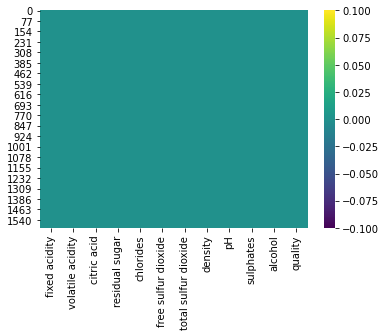

In [13]:
sns.heatmap(df.isnull(),cmap='viridis')

By the heatmap we can see the clearly we don't have null values in data if we have null values in data it gives different shape in place of missing value

<AxesSubplot:xlabel='quality', ylabel='count'>

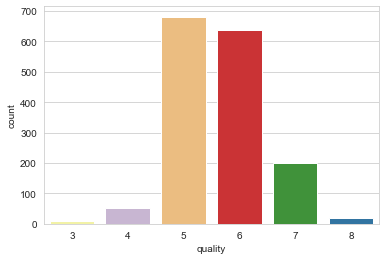

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='quality',data=df,palette='Paired_r')

countplot gives the count of values which is similar

The histogram is used for attribute whose values are numerical and measured on an interval scale. It can also help to detect any unusual gaps (outlier ) in intervals

here we are ploting Lenght intervales of shalls

Text(0.5, 1.0, 'fixed acidity')

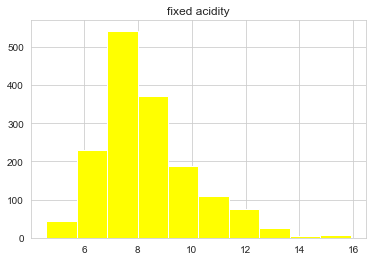

In [15]:
plt.hist(x='fixed acidity',data=df,color='yellow')
plt.title("fixed acidity")

<AxesSubplot:xlabel='density'>

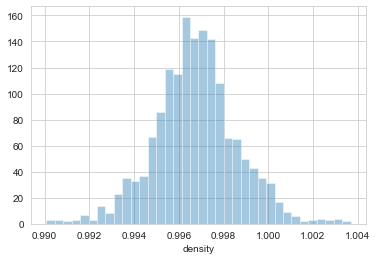

In [16]:
sns.distplot(a=df['density'], kde=False)

distplot() displays a distrinution and range of a set of numeric values plotted against a dimension.

### Bi-variate plot 

ploting the plot by passing 2 variates one is X- axis and second ona is Y-axis

Scatter plots relationships between two numeric variables, the dots in a scatter plot not only report the values of individual data points,but also patterens when the data are taken as a whole, indentification of correlation relationship are common with scatter plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


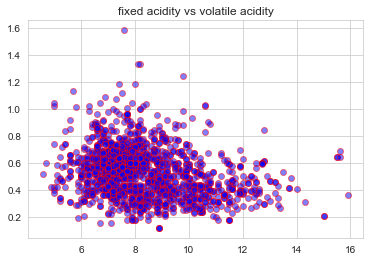

In [17]:
plt.scatter(df["fixed acidity"],df["volatile acidity"],alpha=0.5,c=(0,0,1),edgecolor='r')
plt.title("fixed acidity vs volatile acidity")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


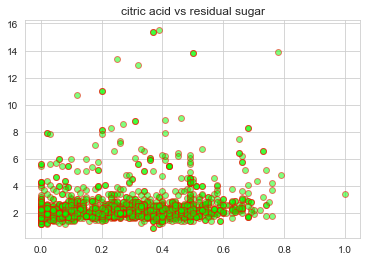

In [18]:
plt.scatter(df["citric acid"],df["residual sugar"],alpha=0.5,c=(0,1,0),edgecolor='r')
plt.title("citric acid vs residual sugar")
plt.show()

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

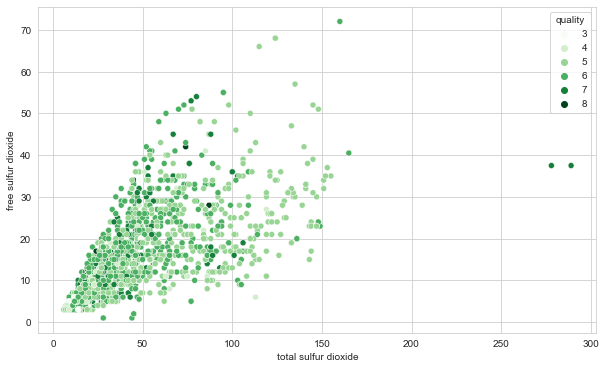

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['total sulfur dioxide'], y=df['free sulfur dioxide'], hue=df['quality'],palette='Greens')

regplot shows that no. of mutual exclusive options for estimating the linear regression in both columns

<AxesSubplot:xlabel='chlorides', ylabel='free sulfur dioxide'>

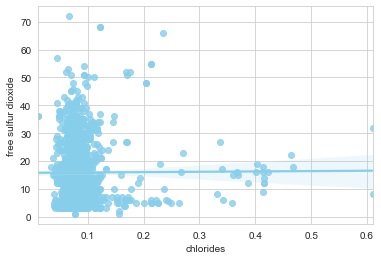

In [20]:
sns.regplot(x=df['chlorides'],y=df['free sulfur dioxide'],color='skyblue')

lmplot is a 2D scatterplot with an optional overlaid regressionline. This is useful for comparing numeric variables

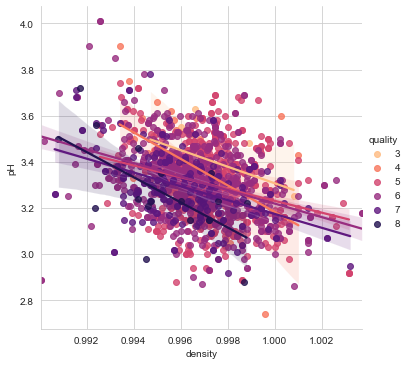

In [21]:
sns.lmplot(x="density", y="pH", hue="quality", data=df,palette='magma_r')

Thejoint plot give 2 answer in one plot

The histogram on the top shows the distribution of the variable at the x-axis and the histogram to the right shows the distribution of the variable at the y-axis. And the scatter plot shows the correlation between both variables

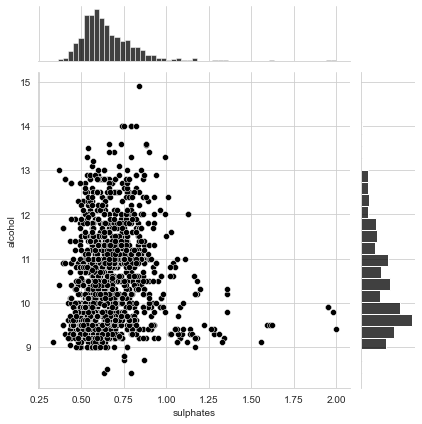

In [22]:
sns.jointplot(x=df['sulphates'],y=df['alcohol'],color='black')

### multi-variate plot

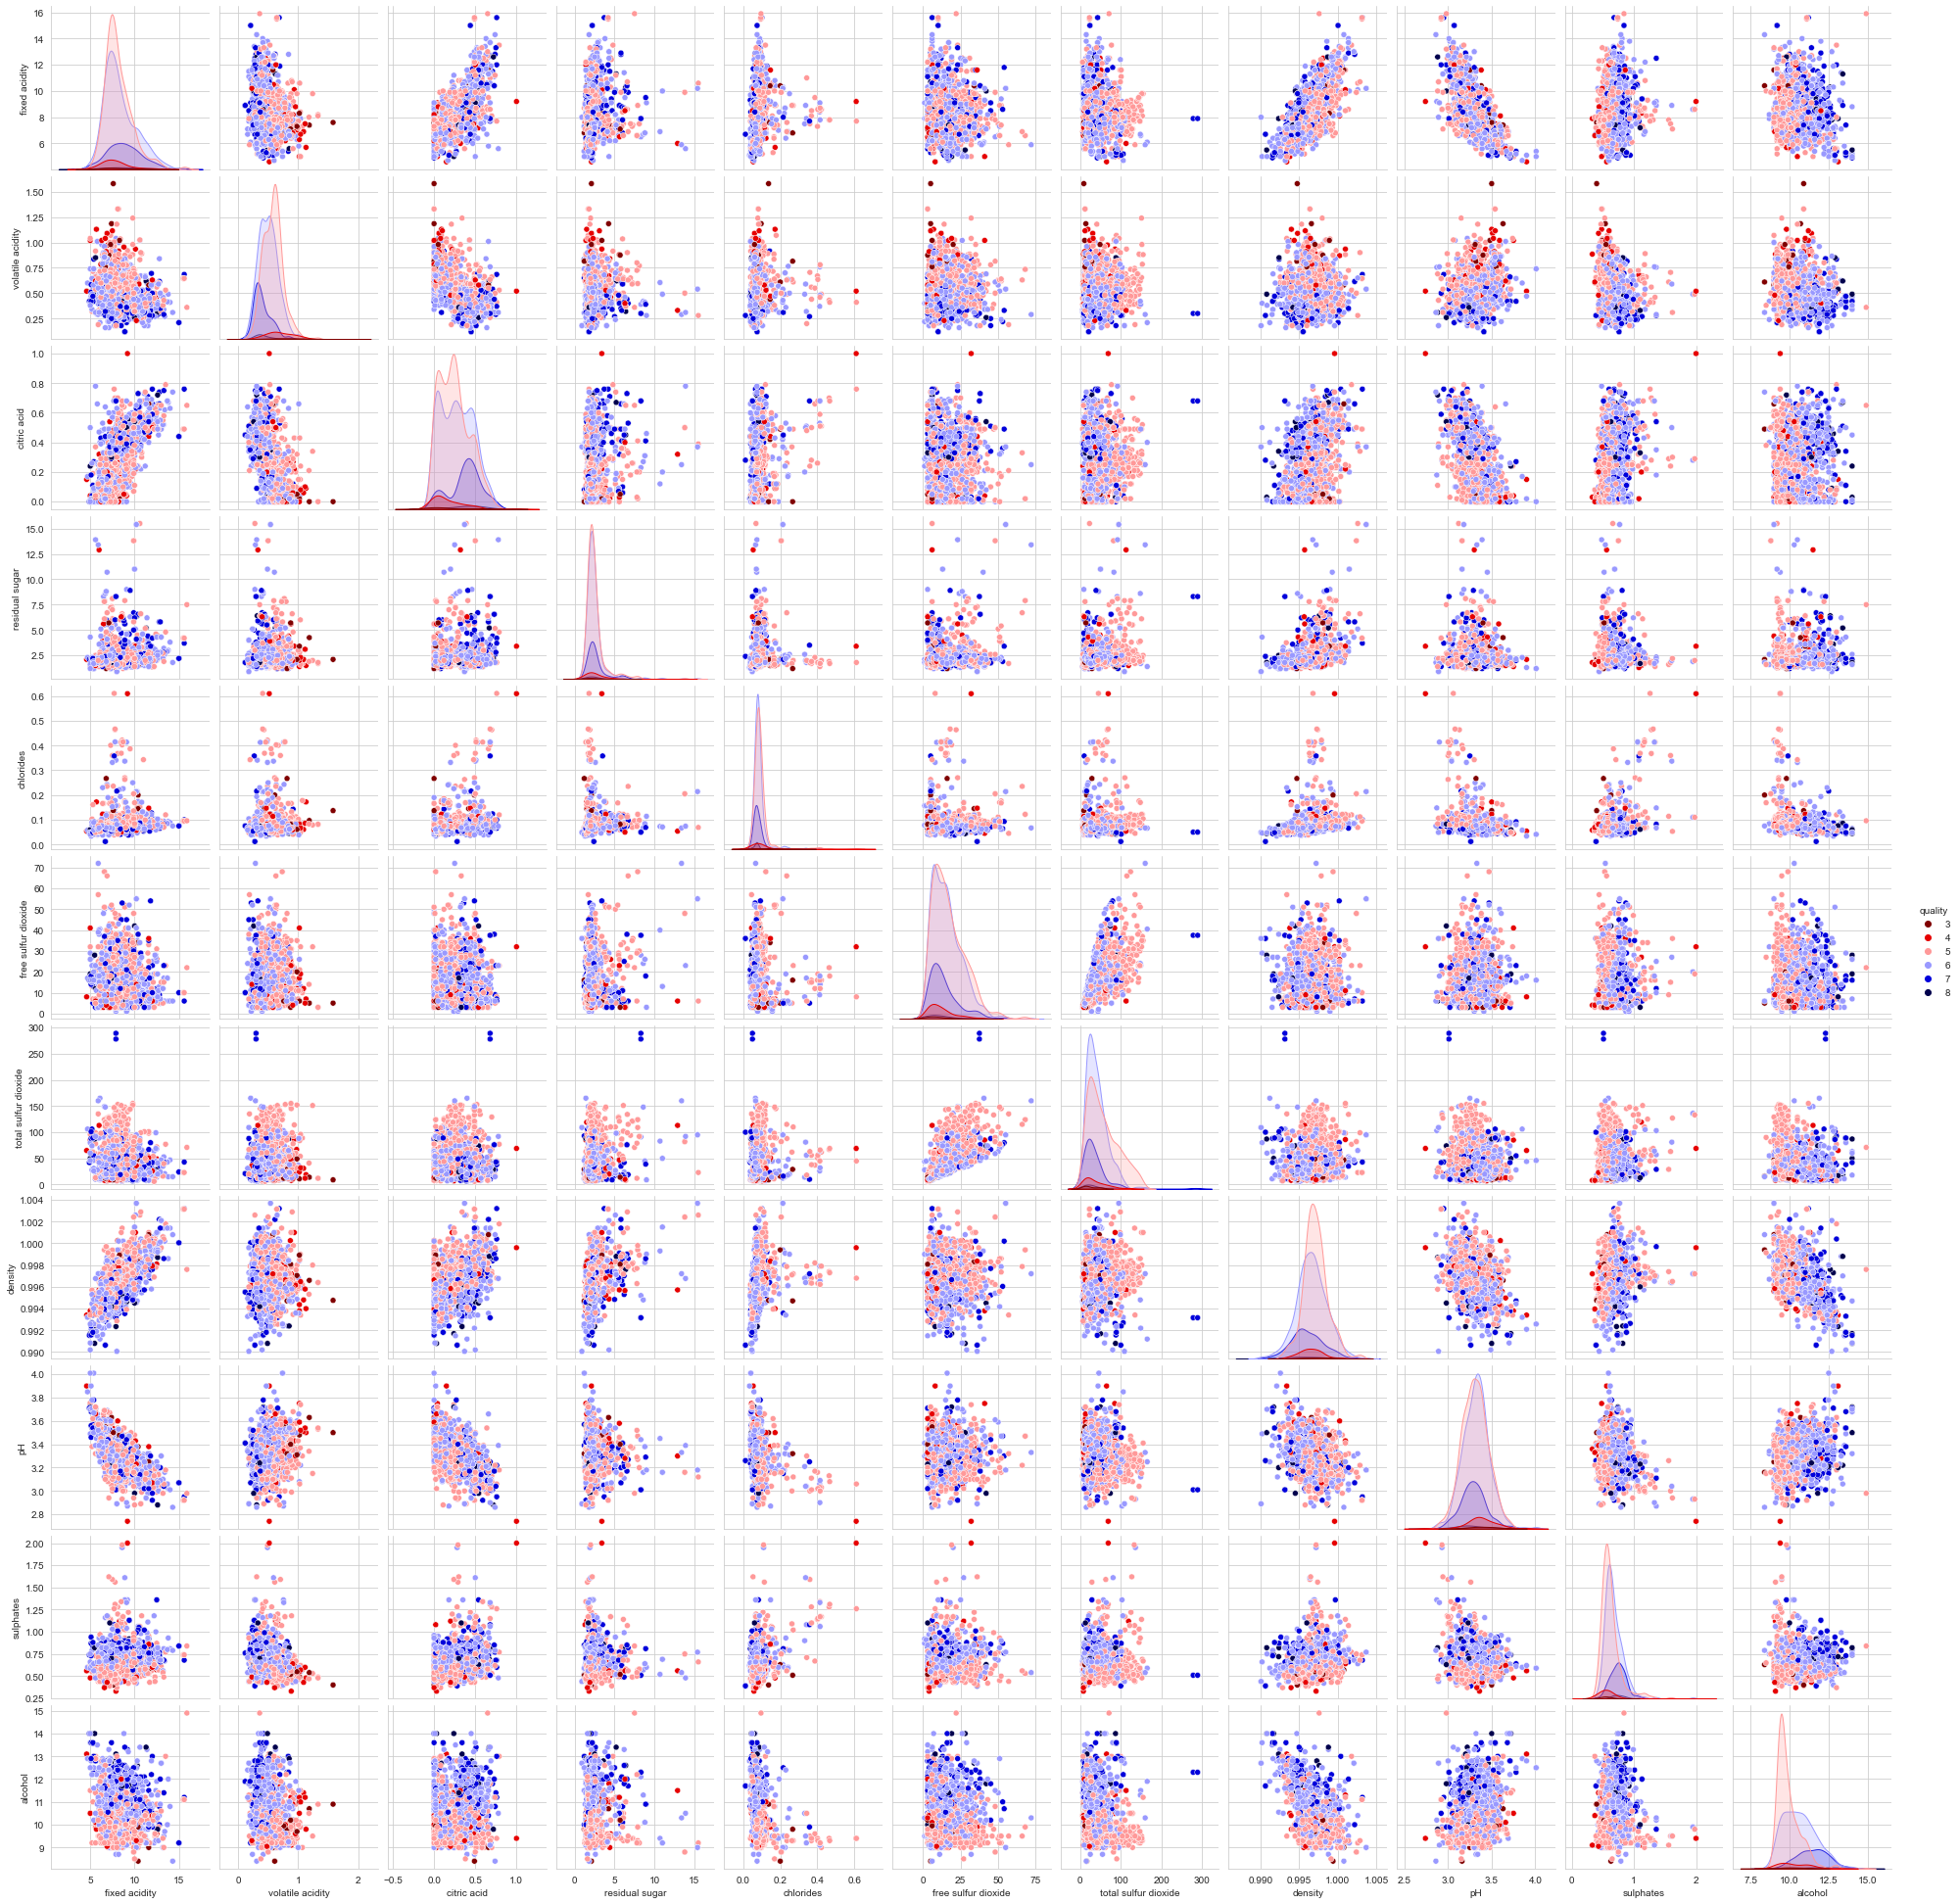

In [23]:
sns.pairplot(df,hue='quality',palette="seismic_r")

## Check the corelation 

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.This is when one variable increases while the other increases and visa versa

In [24]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

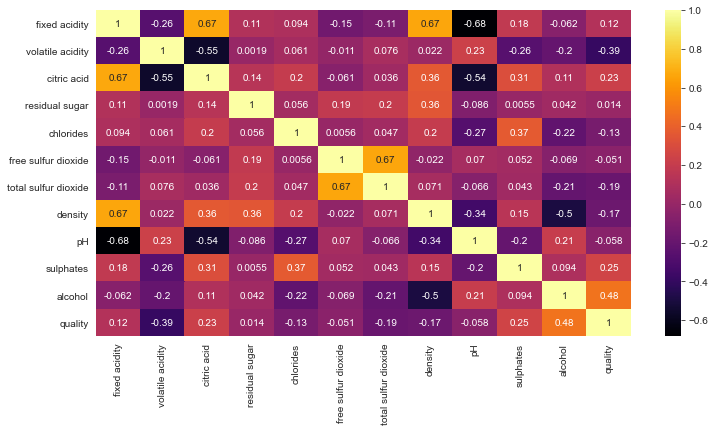

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='inferno',annot=True)

## Check outlier

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Here we no need to plot Rings because it is a target variable

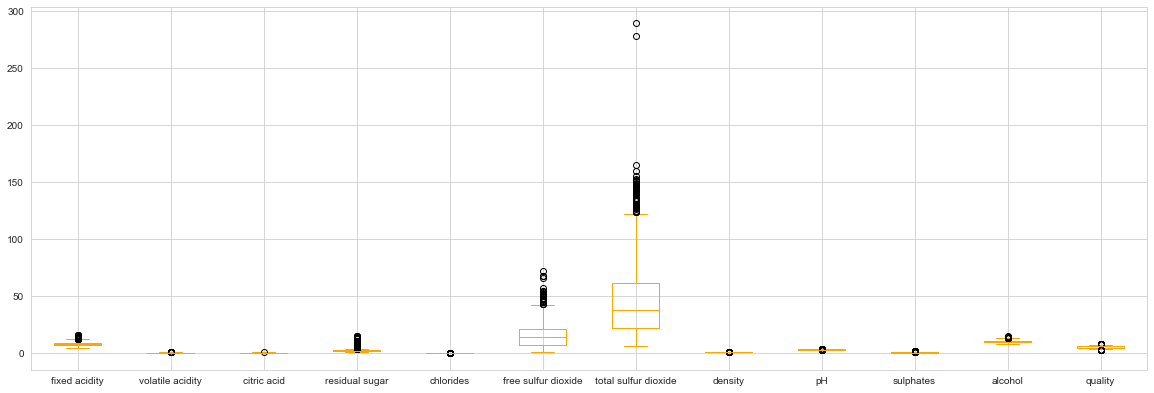

In [26]:
df.boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

we are not able to identifi the outliers in one single plot so make it half and check outliers are near to whisker or for from it
here free slufur dioxides and total sulfur dioxide or have so many so we have to remove in that and lets check for other features by ploting 

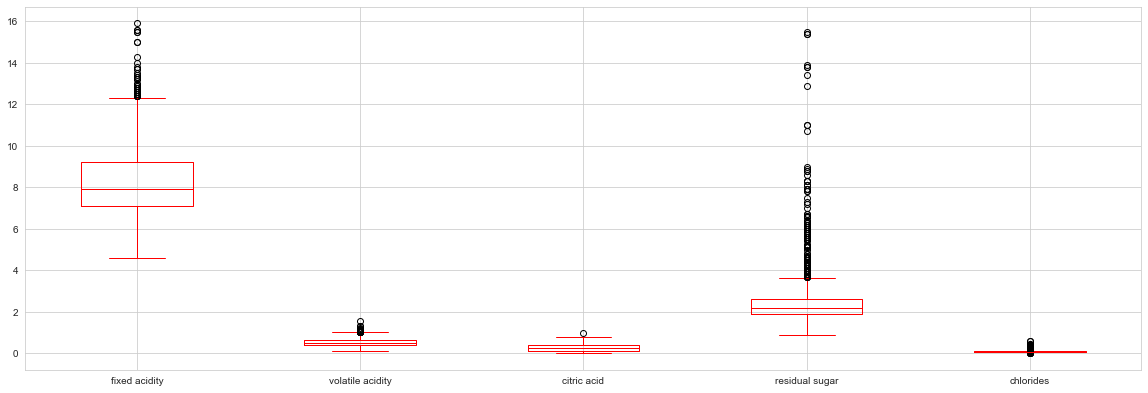

In [27]:
df.iloc[:,0:5].boxplot(figsize=(20,8),color='red')
plt.subplots_adjust(bottom=0.25)
plt.show()

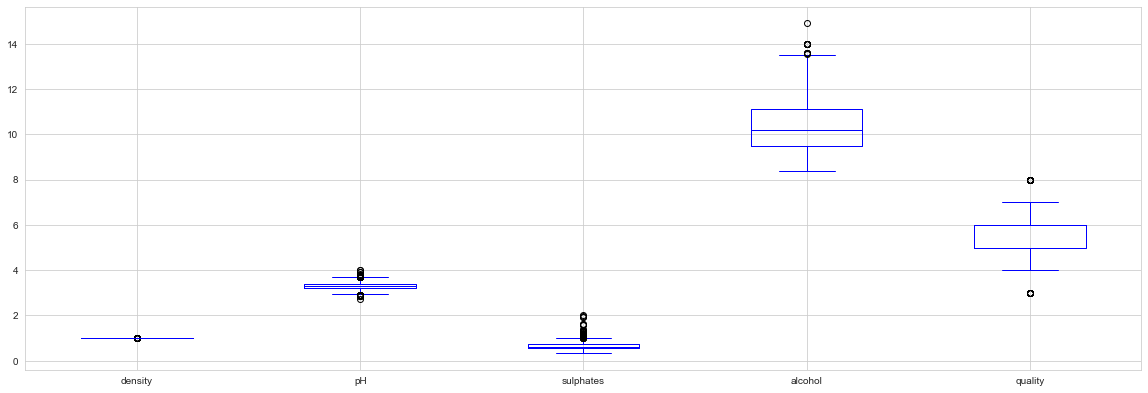

In [28]:
df.iloc[:,7:].boxplot(figsize=(20,8),color='blue')
plt.subplots_adjust(bottom=0.25)
plt.show()

we have outliers in every column we nedd to check each feature one by one and clear the outliers

## Define functions

In [29]:
def hist(data_frame,feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(6,6))
    sns.distplot(data_frame[feature_name],color='orange')

In [30]:
def boxplot(data_frame,feature_name):
    plt.figure(figsize=(6,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name],color='red')

In [31]:
def outlier_norm(data_frame,feature):
    uppper_boundary=data_frame[feature].mean() + 3* data_frame[feature].std()
    lower_boundary=data_frame[feature].mean() - 3* data_frame[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

In [32]:
def outlier_IQR(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

In [33]:
def outlier_extreme(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*3)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*3)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

#### checking outliers and removing by using defined functions

#### fixed acidity feature

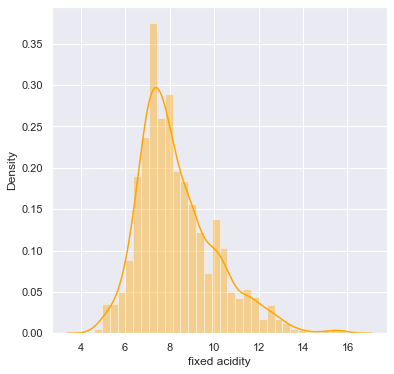

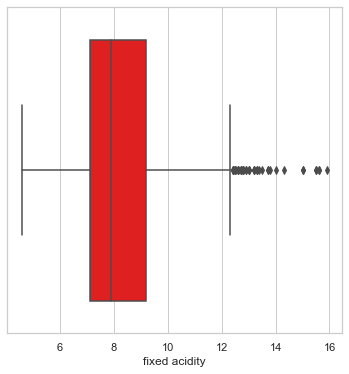

In [34]:
hist(df,'fixed acidity')
boxplot(df,'fixed acidity')

the distribution has right skewed

In [35]:
print(df['fixed acidity'].min())
print(df['fixed acidity'].max())

4.6
15.9


In [36]:
outlier_IQR(df,'fixed acidity')

lower_boundary: 3.95
uppper_boundary 12.349999999999998


In [37]:
df.loc[df['fixed acidity']>12.34,'fixed acidity']=12.34

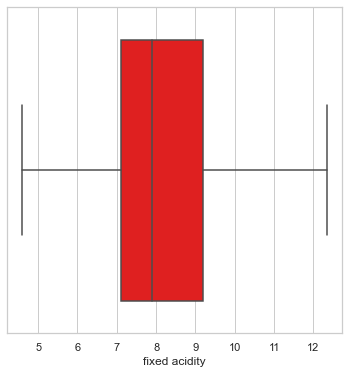

In [38]:
boxplot(df,'fixed acidity')

#### volatile acidity feature

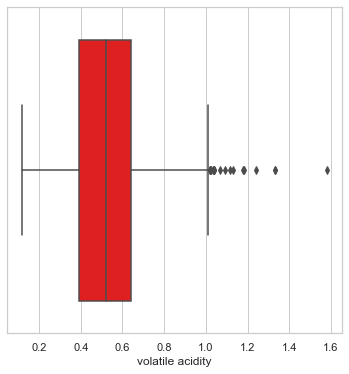

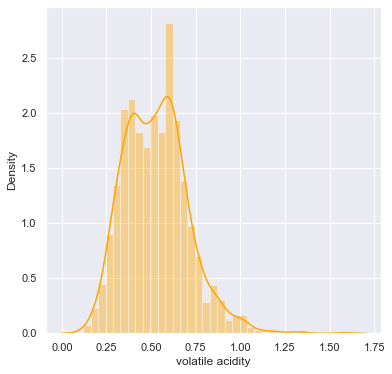

In [39]:
boxplot(df,'volatile acidity')
hist(df,'volatile acidity')

we can see the distribution has skewness

In [40]:
outlier_IQR(df,'volatile acidity')

lower_boundary: 0.015000000000000013
uppper_boundary 1.0150000000000001


In [41]:
df.loc[df['volatile acidity']> 1.015,'volatile acidity']=1.015

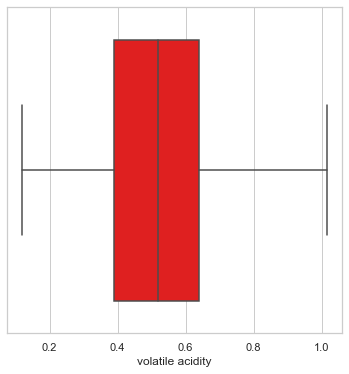

In [42]:
boxplot(df,'volatile acidity')

#### citric acid feature

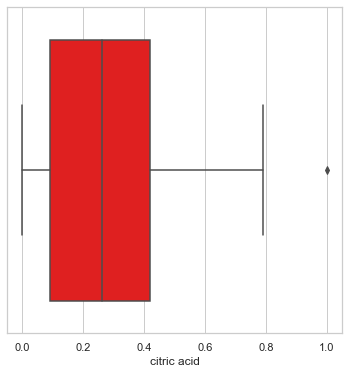

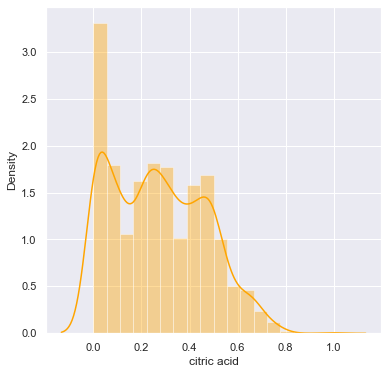

In [43]:
boxplot(df,'citric acid')
hist(df,'citric acid')

distribution is normal 

In [44]:
print(df['citric acid'].min())
print(df['citric acid'].max())

0.0
1.0


In [45]:
outlier_norm(df,'citric acid')

lower_boundary: -0.3134278024598572
uppper_boundary 0.8553790219720501


In [46]:
df.loc[df['citric acid']>0.553,'citric acid']=0.553

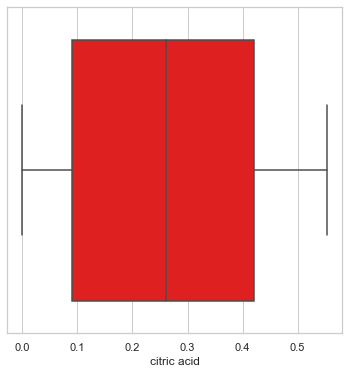

In [47]:
boxplot(df,'citric acid')

residual sugar feature

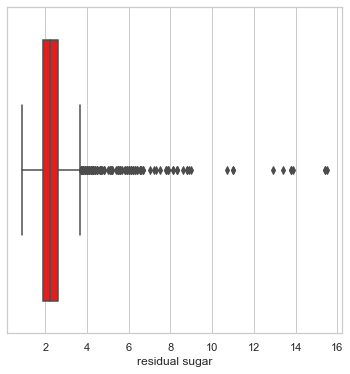

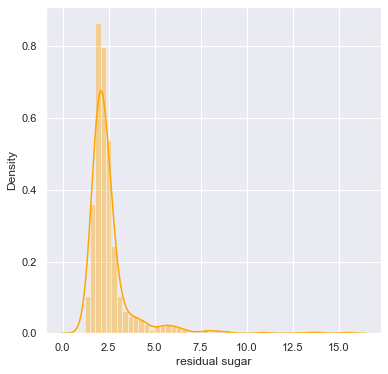

In [48]:
boxplot(df,'residual sugar')
hist(df,'residual sugar')

the distribution is right skewed

In [49]:
outlier_IQR(df,'residual sugar')

lower_boundary: 0.8499999999999996
uppper_boundary 3.6500000000000004


In [50]:
df.loc[df['residual sugar']>3.65,'residual sugar']=3.65

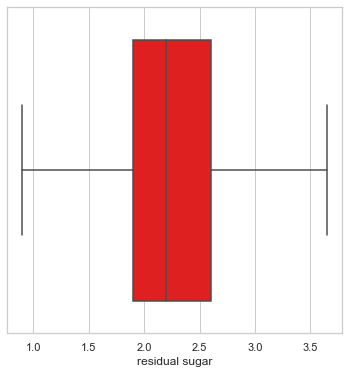

In [51]:
boxplot(df,'residual sugar')

#### chlorides feature

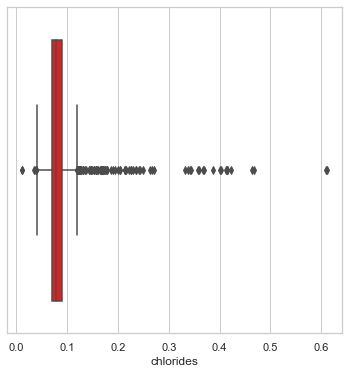

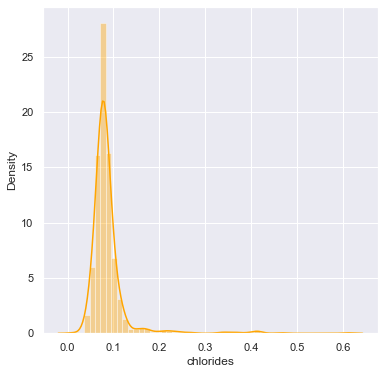

In [52]:
boxplot(df,'chlorides')
hist(df,'chlorides')

the distribution is right skewd

In [53]:
outlier_IQR(df,'chlorides')

lower_boundary: 0.04000000000000002
uppper_boundary 0.11999999999999998


In [54]:
df.loc[df['chlorides']< 0.04,'chlorides']=0.04
df.loc[df['chlorides']> 0.119,'chlorides']=0.119

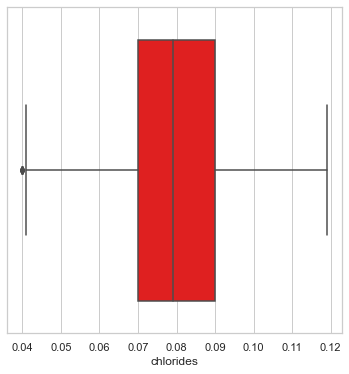

In [55]:
boxplot(df,'chlorides')

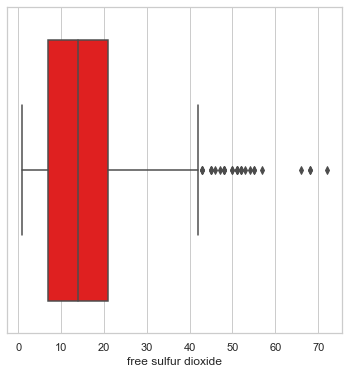

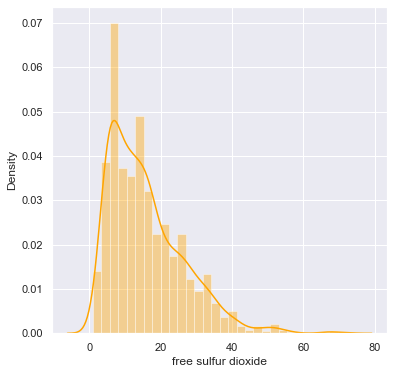

In [56]:
boxplot(df,'free sulfur dioxide')
hist(df,'free sulfur dioxide')

In [57]:
outlier_IQR(df,'free sulfur dioxide')

lower_boundary: -14.0
uppper_boundary 42.0


In [58]:
df.loc[df['free sulfur dioxide']>42 ,'free sulfur dioxide']=42

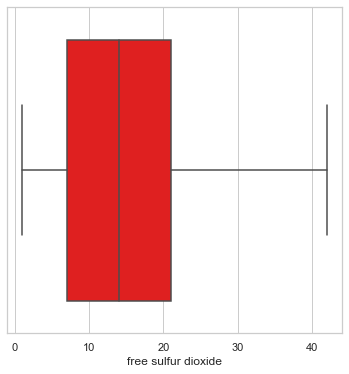

In [59]:
boxplot(df,'free sulfur dioxide')

##### total sulffur dioxide feature

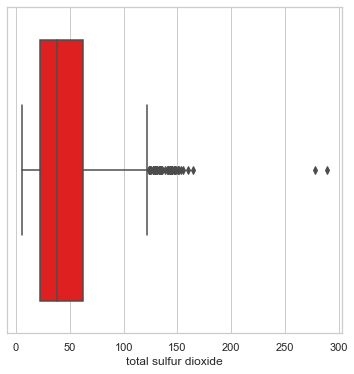

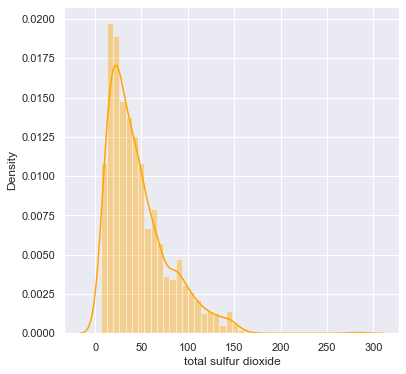

In [60]:
boxplot(df,'total sulfur dioxide')
hist(df,'total sulfur dioxide')

the ditribution is right skewed

In [61]:
outlier_IQR(df,'total sulfur dioxide')

lower_boundary: -38.0
uppper_boundary 122.0


In [62]:
df.loc[df['total sulfur dioxide']>122 ,'total sulfur dioxide']=122

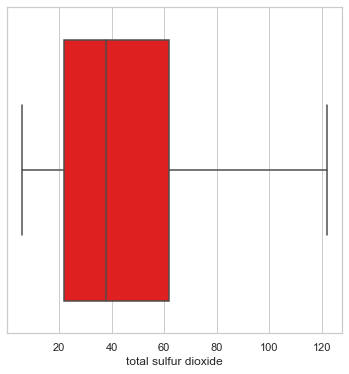

In [63]:
boxplot(df,'total sulfur dioxide')

#### density feature

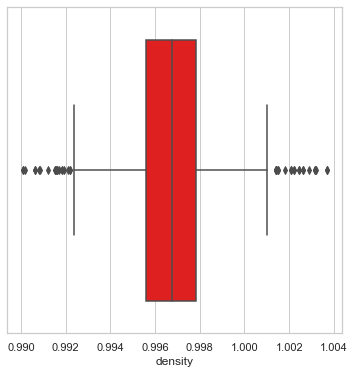

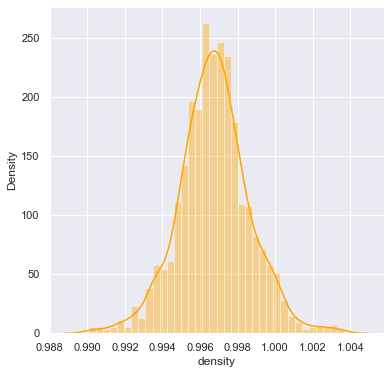

In [64]:
boxplot(df,'density')
hist(df,'density')

The data is normally distributed

In [65]:
outlier_IQR(df,'density')

lower_boundary: 0.9922475000000001
uppper_boundary 1.0011875


In [66]:
df.loc[df['density']<0.9922,'density']=0.9922
df.loc[df['density']>1.0011 ,'density']=1.0011

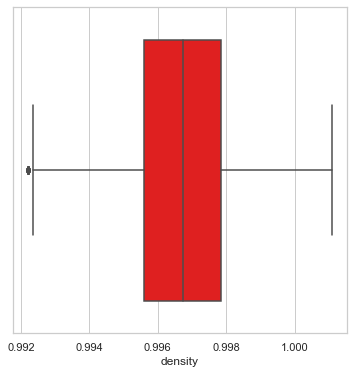

In [67]:
boxplot(df,'density')

#### pH feature

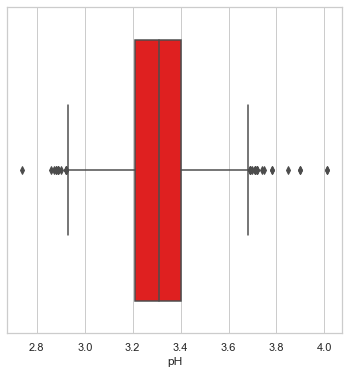

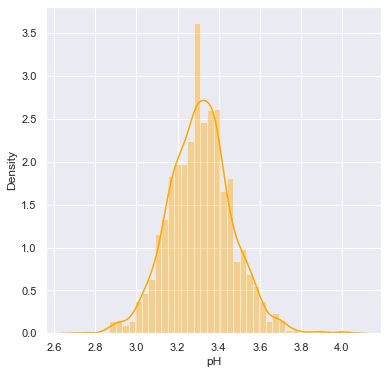

In [68]:
boxplot(df,'pH')
hist(df,'pH')

the distribution is normal

In [69]:
outlier_norm(df,'pH')

lower_boundary: 2.847953801036715
uppper_boundary 3.774272590457971


In [70]:
df.loc[df['pH']<2.86,'pH']=2.86
df.loc[df['pH']>3.75 ,'pH']=3.75

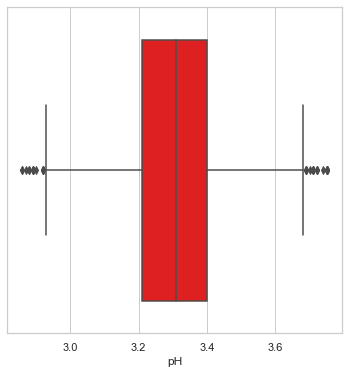

In [71]:
boxplot(df,'pH')

##### sulphates feature

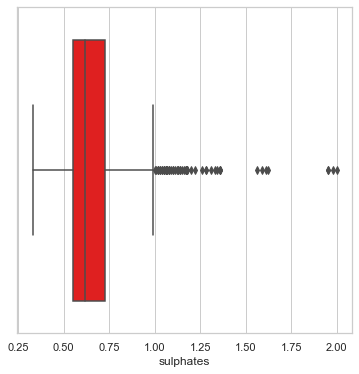

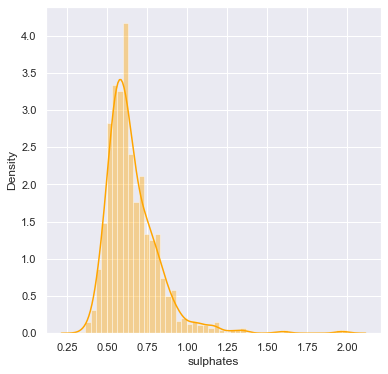

In [72]:
boxplot(df,'sulphates')
hist(df,'sulphates')

the distribution is right skewed

In [73]:
outlier_IQR(df,'sulphates')

lower_boundary: 0.28000000000000014
uppper_boundary 0.9999999999999999


In [74]:
df.loc[df['sulphates']>0.9999 ,'sulphates']=0.9999

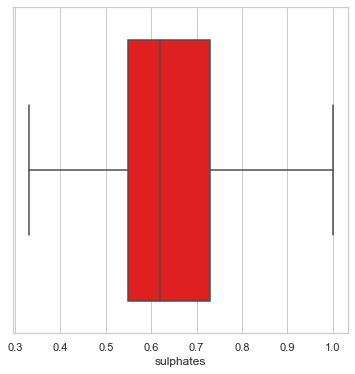

In [75]:
boxplot(df,'sulphates')

#### alcohol feature

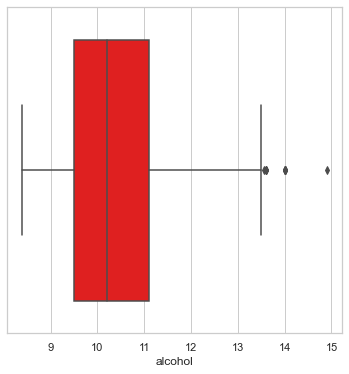

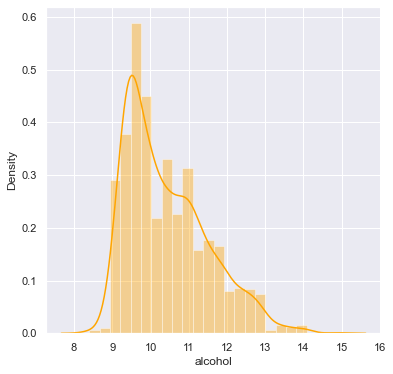

In [76]:
boxplot(df,'alcohol')
hist(df,'alcohol')

the distribution is normal

In [77]:
outlier_norm(df,'alcohol')

lower_boundary: 7.225980368904325
uppper_boundary 13.619985859988681


In [78]:
df.loc[df['alcohol']> 13.619,'alcohol']=13.619

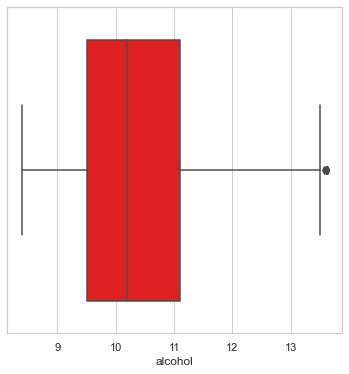

In [79]:
boxplot(df,'alcohol')

## Spliting features and target variable

The project is about to Red wine Quality. here the target variable is quality and remaing are independent features, help to find the good quality of the wine 

In [80]:
x=df.drop('quality',axis=1)
y=df['quality']

### Apply train_test_split 

to build the model we need to split our data in two part as train and test.The train data is use to train tha model to predict the values and, test the predicted values with acutal values

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=35,random_state=42)

In [82]:
x_train.shape

(1564, 11)

In [83]:
x_test.shape

(35, 11)

In [84]:
y_train.shape

(1564,)

In [85]:
y_test.shape

(35,)

## Apply models

### apply LinearRegression

In [86]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [87]:
lm.score(x_train,y_train)

0.3682914544449005

In [88]:
lm.coef_

array([ 4.21692401e-02, -1.07035912e+00, -3.76549481e-01,  3.80100093e-02,
       -3.36137404e+00,  4.46627845e-03, -3.19486465e-03, -2.58353104e+01,
       -3.94348833e-01,  1.24307317e+00,  2.65596656e-01])

In [89]:
#predict the validation data
pred=lm.predict(x_test)

In [90]:
print("r2_score",r2_score(y_test,pred))

r2_score 0.40616148737060564


In [91]:
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance

In [92]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred)))

error:
mean_squared_error: 0.47797940690006757
mean_absolute_error 0.5369641717962722
sqrt_mean_squared_error 0.6913605476884457


In [93]:
print("explained_variance_score:",explained_variance_score(y_test,pred))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,pred))

explained_variance_score: 0.41068235733477165
mean_poisson_deviance: 0.08868679429663874


In [94]:
#cross validation score for Linear Regression
scr=cross_val_score(lm,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.31026790692317124


### Apply Randomized Searchcv on Linear model

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
parameters = {'fit_intercept':['bool','True'],
             'normalize':['bool','False']}

rd_linear=RandomizedSearchCV(lm,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)
rd_linear.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'fit_intercept': ['bool', 'True'],
                                        'normalize': ['bool', 'False']},
                   verbose=2)

In [97]:
rd_linear.best_estimator_

LinearRegression(fit_intercept='bool', normalize='bool')

In [98]:
rd_linear.best_score_

0.3545638939495178

In [99]:
#prediction on validation data
rd_linear_pred=rd_linear.predict(x_test)

In [100]:
print("r2_score",r2_score(y_test,rd_linear_pred))

r2_score 0.4061614873706072


In [101]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rd_linear_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rd_linear_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rd_linear_pred)))

error:
mean_squared_error: 0.47797940690006635
mean_absolute_error 0.5369641717962728
sqrt_mean_squared_error 0.6913605476884448


### Apply Lasso

In [102]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3624010229252591

In [103]:
#prediction on validation data
pred1=ls.predict(x_test)

In [104]:
ls.coef_

array([ 0.01756142, -1.08042163, -0.26913831, -0.00688095, -0.        ,
        0.00523473, -0.00342988, -0.        , -0.35477366,  1.0667126 ,
        0.30261842])

In [105]:
print("r2_score",r2_score(y_test,pred1))

r2_score 0.4241302810713703


In [106]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred1))
print("mean_absolute_error",mean_absolute_error(y_test,pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred1)))

error:
mean_squared_error: 0.4635163615213297
mean_absolute_error 0.5266736035846792
sqrt_mean_squared_error 0.6808203592147709


In [107]:
print("explained_variance_score:",explained_variance_score(y_test,pred1))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,pred1))

explained_variance_score: 0.4287726573357933
mean_poisson_deviance: 0.08615905397173747


In [108]:
#cross validation score for lasso regression
scr=cross_val_score(ls,x,y,cv=5)
print("Cross validation score of Lasso Regression model:",scr.mean())

Cross validation score of Lasso Regression model: 0.3067763095871869


### Apply Randomized Searchcv on Lasso model

In [109]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
rdm_lasso = RandomizedSearchCV(ls,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1]},
                   verbose=2)

In [110]:
rdm_lasso_pred= rdm_lasso.predict(x_test)

In [111]:
rdm_lasso.best_estimator_

Lasso(alpha=0.0001)

In [112]:
rdm_lasso.best_score_

0.35489404896550497

In [113]:
print("r2_score",r2_score(y_test,rdm_lasso_pred))

r2_score 0.4119018975993469


In [114]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_lasso_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_lasso_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_lasso_pred)))

error:
mean_squared_error: 0.47335896242207665
mean_absolute_error 0.5319497407292717
sqrt_mean_squared_error 0.688010873767324


### Apply Ridge Regression

In [115]:
rg=Ridge()
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.3651855507307825

In [116]:
#prediction on validation data
rg_pred=ls.predict(x_test)

In [117]:
rg.coef_

array([ 0.01965784, -1.09796537, -0.35274296, -0.00282323, -0.98789552,
        0.00502712, -0.0033363 , -0.02744721, -0.43857958,  1.10969458,
        0.30131865])

In [118]:
print("r2_score",r2_score(y_test,rg_pred))

r2_score 0.4241302810713703


In [119]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rg_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rg_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rg_pred)))

error:
mean_squared_error: 0.4635163615213297
mean_absolute_error 0.5266736035846792
sqrt_mean_squared_error 0.6808203592147709


In [120]:
print("explained_variance_score:",explained_variance_score(y_test,rg_pred))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,rg_pred))

explained_variance_score: 0.4287726573357933
mean_poisson_deviance: 0.08615905397173747


In [121]:
#cross validation score for Ridge regression
scr=cross_val_score(ls,x,y,cv=5)
print("Cross validation score of Ridge Regression model:",scr.mean())

Cross validation score of Ridge Regression model: 0.3067763095871869


### Apply Randomized Searchcv on Ridge model

In [122]:
parameters = {"alpha":[1,2,5,10,15,20]}

rd_ridge=RandomizedSearchCV(rg,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rd_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20]},
                   verbose=2)

In [123]:
rd_ridge.best_estimator_

Ridge(alpha=1)

In [124]:
rd_ridge.best_score_

0.35409189597678753

In [125]:
# prediction on validation data
rd_ridge_pred= rd_ridge.predict(x_test)

In [126]:
print("r2_score",r2_score(y_test,rd_ridge_pred))
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rd_ridge_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rd_ridge_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rd_ridge_pred)))

r2_score 0.42162966012415926
error:
mean_squared_error: 0.4655291062184318
mean_absolute_error 0.5281292834730426
sqrt_mean_squared_error 0.6822969340532257


### Apply Gradient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.6261337884769298

In [129]:
# prediction on validation data
gbr_pred= gbr.predict(x_test)

In [130]:
r2_score(y_test,gbr_pred)

0.4837447273999157

In [131]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,gbr_pred))
print("mean_absolute_error",mean_absolute_error(y_test,gbr_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,gbr_pred)))

error:
mean_squared_error: 0.4155328153336189
mean_absolute_error 0.4707617112150219
sqrt_mean_squared_error 0.6446183485859047


In [132]:
print("explained_variance_score:",explained_variance_score(y_test,gbr_pred))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,gbr_pred))

explained_variance_score: 0.4870346025928136
mean_poisson_deviance: 0.07849923567976735


In [133]:
#cross validation score for GradientBoostingRegressor regression
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of GradientBoostingRegressor model:",scr.mean())

Cross validation score of GradientBoostingRegressor model: 0.3197131011253985


#### Apply Randomized Searchcv on GB model.

In [134]:
parameters = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gbr,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [135]:
rdm_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=15, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=10,
                          n_estimators=300)

In [136]:
#Prediction Validation Data

rdm_gb_pred= rdm_gb.predict(x_test)

In [137]:
r2_score(y_test,rdm_gb_pred)

0.5296023918691228

In [138]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_gb_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_gb_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_gb_pred)))

error:
mean_squared_error: 0.37862207478942433
mean_absolute_error 0.4156778775564608
sqrt_mean_squared_error 0.6153227403480424


### Apply Decision Tree Regressor

In [139]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [140]:
#Prediction on validation data
dt_pred= dt.predict(x_test)
r2_score(y_test,dt_pred)

0.2545638945233265

In [141]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,dt_pred)))

error:
mean_squared_error: 0.6
mean_absolute_error 0.4857142857142857
sqrt_mean_squared_error 0.7745966692414834


In [142]:
print("explained_variance_score:",explained_variance_score(y_test,dt_pred))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,dt_pred))

explained_variance_score: 0.26369168356997996
mean_poisson_deviance: 0.10983342244182889


In [143]:
#cross validation score for DecisionTreeRegressor
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model:",scr.mean())

Cross validation score of DecisionTreeRegressor model: -0.33460121680545435


#### Apply Randomized Searchcv on DecisionTree model.

In [144]:
parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [145]:
rdm_dt.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=7,
                      min_samples_split=5)

In [146]:
#Prediction Validation Data

rdm_dt_pred = rdm_dt.predict(x_test)

r2_score(y_test,rdm_dt_pred)

0.28832951302817245

In [147]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_dt_pred)))

error:
mean_squared_error: 0.5728221225748751
mean_absolute_error 0.5405208006844595
sqrt_mean_squared_error 0.7568501321760307


#### Apply RadiusNeighborsRegressor

In [148]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [149]:
rnf= RadiusNeighborsRegressor()
rnf.fit(x_train,y_train)
rnf.score(x_train,y_train)

0.9581138359162967

In [150]:
#Prediction on validation dataset
rnf_pred = rnf.predict(x_test)

In [151]:
r2_score(y_test,rnf_pred)

-5.7375196248079125e+37

In [152]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rnf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rnf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rnf_pred)))

error:
mean_squared_error: 4.6181178367841645e+37
mean_absolute_error 5.006973391435449e+18
sqrt_mean_squared_error 6.795673503622849e+18


In [153]:
#cross validation score for RadiusNeighborsRegreesor
scr=cross_val_score(rnf,x,y,cv=5)
print("Cross validation score of RadiusNeighborsRegressor model:",scr.mean())

Cross validation score of RadiusNeighborsRegressor model: -1.2569668342527231e+38


#### Apply Randomized Searchcv on RadiusNeighborsRegressor

In [154]:

parameters = {'weights':['uniform','distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

rdm_rnf= RandomizedSearchCV(rnf,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_rnf.fit(x_train,y_train)

Fitting 8 folds for each of 8 candidates, totalling 64 fits


RandomizedSearchCV(cv=8, estimator=RadiusNeighborsRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [155]:
rdm_rnf.best_estimator_

RadiusNeighborsRegressor()

In [156]:
rdm_rnf.best_score_

-8.46403661302198e+37

In [157]:
#Prediction Validation Data

rdm_rnf_pred = rdm_rnf.predict(x_test)

In [158]:
r2_score(y_test,rdm_rnf_pred)

-5.7375196248079125e+37

In [160]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_rnf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_rnf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_rnf_pred)))

error:
mean_squared_error: 4.6181178367841645e+37
mean_absolute_error 5.006973391435449e+18
sqrt_mean_squared_error 6.795673503622849e+18


### Apply KNN Regressor

In [161]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.4303700840478144

In [163]:
#Prediction on Test Dataset.
knn_pred= knn.predict(x_test)

In [164]:
r2_score(y_test,knn_pred)

0.3269776876267748

In [165]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred)))

error:
mean_squared_error: 0.5417142857142857
mean_absolute_error 0.5600000000000002
sqrt_mean_squared_error 0.7360124222554166


In [166]:
print("explained_variance_score:",explained_variance_score(y_test,dt_pred))
print("mean_poisson_deviance:",mean_poisson_deviance(y_test,dt_pred))

explained_variance_score: 0.26369168356997996
mean_poisson_deviance: 0.10983342244182889


In [167]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

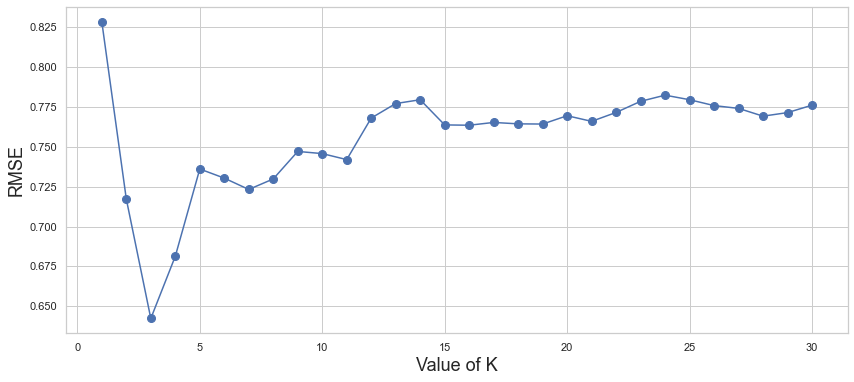

In [168]:
plt.figure(figsize=(14,6))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

In [169]:
knn_model  = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.35647278204003696

In [170]:
#do Prediction on Test Dataset
knn_pred1= knn_model.predict(x_test)

In [171]:
r2_score(y_test,knn_pred1)

0.33831452839756593

In [172]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred1))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred1)))

error:
mean_squared_error: 0.5325892857142858
mean_absolute_error 0.5678571428571428
sqrt_mean_squared_error 0.7297871509654619


In [173]:
#cross validation score for KNeighborsRegressor
scr=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighborsRegressor model:",scr.mean())

Cross validation score of KNeighborsRegressor model: -0.05114646705046681


## conculsion

The best fit model is GradientBoostingRegressor

## saving the model

In [174]:
import joblib
joblib.dump(gbr,"Red_wine_Quality_Prediction.pkl")

['Red_wine_Quality_Prediction.pkl']

## load the model

In [175]:
model=joblib.load("Red_wine_Quality_Prediction.pkl")

In [176]:
pred=model.predict(x_test)

In [177]:
scr=cross_val_score(model,x,y,cv=5)
print("Cross validation score of GradientBoostRegressor model:",scr.mean())

Cross validation score of GradientBoostRegressor model: 0.321610904675705


## converting the regression problem to classification

In [178]:
df.loc[df['quality']<6,'quality']=0

In [179]:
df.loc[df['quality']>5,'quality']=1

In [193]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [194]:
x1=df.drop('quality',axis=1)
y1=df['quality']

In [197]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=35,random_state=42)

In [198]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
pred=gbc.predict(x1_test)
print('accuracy_score:',accuracy_score(y1_test,pred))

accuracy_score: 0.8


In [199]:
print('roc_auc_score:',roc_auc_score(y1_test,pred))

roc_auc_score: 0.8006535947712418


In [200]:
logit_roc_auc1=roc_auc_score(y_test,pred)

In [201]:
fpr,tpr,thresholds=roc_curve(y_test,gbc.predict_proba(x_test)[:,1])

In [202]:
fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 0.17647059, 0.17647059, 0.23529412,
       0.23529412, 0.52941176, 0.52941176, 0.64705882, 0.64705882,
       1.        ])

In [203]:
tpr

array([0.        , 0.05555556, 0.38888889, 0.38888889, 0.5       ,
       0.5       , 0.72222222, 0.72222222, 0.77777778, 0.77777778,
       0.88888889, 0.88888889, 0.94444444, 0.94444444, 1.        ,
       1.        ])

In [204]:
thresholds

array([1.9764161 , 0.9764161 , 0.84946404, 0.78538139, 0.71064694,
       0.70979441, 0.58141074, 0.57694587, 0.53886248, 0.43895459,
       0.38905616, 0.31304003, 0.30899178, 0.24197298, 0.23820229,
       0.06198917])

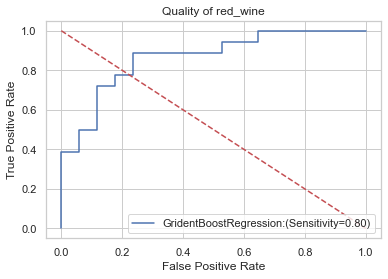

In [205]:
plt.figure()
plt.plot(fpr,tpr,label='GridentBoostRegression:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()